# Big Mart III

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined.<br>
The aim is **to build a predictive model and find out the sales of each product at a particular store.**

Using this model, BigMart will try `to understand the properties of products` and `stores which play a key role in increasing sales`.


Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly.

#### Data
We have train (8523) and test (5681) data set, train data set has both input and output variable(s). You need to predict the sales for test data set.

| Variable | Description
| :-------- | :-----------
| **Item_Identifier**| Unique product ID
| **Item_Weight** | Weight of product
| **Item_Fat_Content** | Whether the product is low fat or not
| **Item_Visibility** | The % of total display area of all products in a store allocated to the particular product
| **Item_Type** | The category to which the product belongs
| **Item_MRP** | Maximum Retail Price (list price) of the product
| **Outlet_Identifier** | Unique store ID
| **Outlet_Establishment_Year** | The year in which store was established
| **Outlet_Size** | The size of the store in terms of ground area covered
| **Outlet_Location_Type** | The type of city in which the store is located
| **Outlet_Type** | Whether the outlet is just a grocery store or some sort of supermarket
| **Item_Outlet_Sales** | Sales of the product in the particulat store. This is the outcome variable to be predicted.

#### Evaluation Metric:

Your model performance will be evaluated on the basis of your prediction of the sales for the test data (test.csv), which contains similar data-points as train except for the sales to be predicted. Your submission needs to be in the format as shown in "SampleSubmission.csv".

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("SampleSubmission.csv")

#### How  should the submission look like?

In [2]:
sample.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,0
1,FDW14,OUT017,0
2,NCN55,OUT010,0
3,FDQ58,OUT017,0
4,FDY38,OUT027,0


___

# The approach

*`reminder, the goal is to build a predictive model and find out the sales of each product at a particular store`*<br>

 - Exploratory Data Analysis
 - Sum-up of next steps
 - Feature Engineering
 - Model comparison (random forest, fast tree)
 - Sample check
 - Prediction

___

# Exploratory Data Analysis

**What do train.csv and test.csv files contain?**

In [3]:
print("train data shape:", train.shape)
print("test data shape:", test.shape)

train data shape: (8523, 12)
test data shape: (5681, 11)


**Ok, there is one observation of difference between train and test datasets.**

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


**The missing obversation is Item_Outlet_Sales which is not included in test dataset.<br>
<br>Let's simplify by merging these two datasets as we will, later on, split them anyway before implementing the chosen regressor algorithm.**

In [6]:
import warnings
warnings.filterwarnings('always')

train['source'] = "train"
test['source'] = "test"

tt = [train, test]
ttdata = pd.concat(tt)
print("train + test dataset shape:", ttdata.shape)
ttdata.head()

train + test dataset shape: (14204, 13)


/Users/mikehatchi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2,train
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1,train
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,NaN,Grocery Store,train
4,Low Fat,NCD19,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1,train


**1. Looking at uniqueness of data.**

In [7]:
ttdata.apply(lambda x: len(x.unique()))

Item_Fat_Content                 5
Item_Identifier               1559
Item_MRP                      8052
Item_Outlet_Sales             3494
Item_Type                       16
Item_Visibility              13006
Item_Weight                    416
Outlet_Establishment_Year        9
Outlet_Identifier               10
Outlet_Location_Type             3
Outlet_Size                      4
Outlet_Type                      4
source                           2
dtype: int64

**`Item_MRP` is a important compare to `Item_Identifier`. Hypothesis, the. In other words, there are more prices than products and the latter is relatively large.**

**2. Looking at statistic information about the data.**

In [8]:
ttdata.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,11765.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.792854,1997.830681
std,62.086938,1706.499616,0.051459,4.652502,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,8.710000,1987.000000
50%,142.247000,1794.331000,0.054021,12.600000,1999.000000
75%,185.855600,3101.296400,0.094037,16.750000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


**`'Item_Visibility'` has 0 as a minimum value. It has to be imputed.
Also, age of Outlet will be more relevant instead of YEAR. In other words, 23 years is better thant 1997.**

**3. Looking at any missing value among data.**

In [9]:
ttdata.isnull().sum()/len(train)*100

Item_Fat_Content              0.000000
Item_Identifier               0.000000
Item_MRP                      0.000000
Item_Outlet_Sales            66.654934
Item_Type                     0.000000
Item_Visibility               0.000000
Item_Weight                  28.616684
Outlet_Establishment_Year     0.000000
Outlet_Identifier             0.000000
Outlet_Location_Type          0.000000
Outlet_Size                  47.119559
Outlet_Type                   0.000000
source                        0.000000
dtype: float64

+ 66,7% of `Item_Outlet_Sales` are missing because this observation is not include in test dataset.
+ 11,5% of `Item_weigh` of missing value have to be imputed.
+ 18,8% of `Outlet_Size` of missing value have to be imputed.

**4. Checking the categories labelization (for none-numerical) & frequencies.**

In [10]:
# ttdata.info()

In [11]:
# gathering only the non-numerical type
cat_col = [cat for cat in ttdata.dtypes.index if ttdata.dtypes[cat]=='object']

# printing the frequencies for each category
for col in cat_col:
    print('\nFrequency of categories within {}'.format(col))
    print(ttdata[col].value_counts())


Frequency of categories within Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of categories within Item_Identifier
FDQ04    10
NCV41    10
FDR02    10
FDY14    10
NCW29    10
         ..
FDO33     7
DRN11     7
FDM10     7
FDR51     7
FDI46     7
Name: Item_Identifier, Length: 1559, dtype: int64

Frequency of categories within Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of categories within Outlet_Identifier
OU

+ There is heterogeneity in the labelization within `Item_Fat_Content` but with common meaning. Low Fat == low fat == LF and so on.
+ `Item_Identifier` seems to have recurrent labelization,
+ But, `Item_Type` frequencies is larger than `Item_Identifier`. These two, labelization might need some reduction.
+ Outlet `OUT010` and `OUT019` have almost half less presence than the other.

___

# Sum-up for next steps

1. `Item_Visibility` == 0 as a minimum value will be imputed.
2. `Item_weight` and `Outlet_Size` missing values will be imputed.
3. Age of outlet will replace `Outlet_Establishment_Year`.  
4. Cleaning `Item_Fat_Content` labelization, eg.: Low Fat == low fat == LF and so on.
5. Perhaps provide homogeneity in `Item_Identifier` labelization. (not mandatory)
6. Perhaps provide homogeneity in `Item_Type` labelization. (not mandatory)
7. Outlet `OUT010` and `OUT019` have almost half less presence than the other.
8. `'Item_Outlet_Sales'`will be drop off the global dataset.

___

# Homogenization of the data

### 1. Item_Visibility == 0 as a minimum value will be imputed.

In [12]:
# diving into Item_Visibility distribution.
ttdata['Item_Visibility'].value_counts().head()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
Name: Item_Visibility, dtype: int64

In [13]:
# replace the 0 by NaN value and check that entries have been replaced.
ttdata['Item_Visibility'] = ttdata['Item_Visibility'].replace({0:np.nan})
ttdata['Item_Visibility'].value_counts().head()

0.077169    3
0.077011    3
0.076841    3
0.076483    3
0.077290    3
Name: Item_Visibility, dtype: int64

### 2. Replacing `Item_Weight`, `Outlet_Size` missing value.

In [14]:
ttdata['Item_Weight'].fillna(ttdata['Item_Weight'].median(), inplace=True)
ttdata['Outlet_Size'].fillna(ttdata['Outlet_Size'].mode()[0], inplace=True)

### 3. Age of outlet replaces `Outlet_Establishment_Year` as `Outlet_Age`.

In [15]:
import datetime

today = datetime.datetime.now()
age = today.year - ttdata['Outlet_Establishment_Year']

ttdata['Outlet_Age'] = age
ttdata = ttdata.drop(['Outlet_Establishment_Year'], axis = 1)
ttdata.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Age
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,OUT049,Tier 1,Medium,Supermarket Type1,train,21
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,OUT018,Tier 3,Medium,Supermarket Type2,train,11
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,OUT049,Tier 1,Medium,Supermarket Type1,train,21
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,NaN,19.20,OUT010,Tier 3,Medium,Grocery Store,train,22
4,Low Fat,NCD19,53.8614,994.7052,Household,NaN,8.93,OUT013,Tier 3,High,Supermarket Type1,train,33


### 4. Cleaning `Item_Fat_Content` labelization, eg.: Low Fat == low fat == LF and so on.

In [16]:
# recall that we have parsed nomination Low Fat, low fat, LF for Low Fat and Regular, reg for Regular.
ttdata['Item_Fat_Content'] = ttdata['Item_Fat_Content'].replace({'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'})

# checking of the replacement.
print(ttdata['Item_Fat_Content'].value_counts())

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


**Ckecking of any missing value.**

In [17]:
ttdata.isnull().sum()/len(ttdata)*100

Item_Fat_Content         0.000000
Item_Identifier          0.000000
Item_MRP                 0.000000
Item_Outlet_Sales       39.995776
Item_Type                0.000000
Item_Visibility          6.188398
Item_Weight              0.000000
Outlet_Identifier        0.000000
Outlet_Location_Type     0.000000
Outlet_Size              0.000000
Outlet_Type              0.000000
source                   0.000000
Outlet_Age               0.000000
dtype: float64

In [18]:
#ttdata.boxplot(column='Item_Weight', by='Outlet_Identifier', rot=90)

#### Having a look on distribution of numeric items and correlation between them.

/Users/mikehatchi/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/mikehatchi/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/mikehatchi/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/mikehatchi/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/Users/mikehatchi/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args

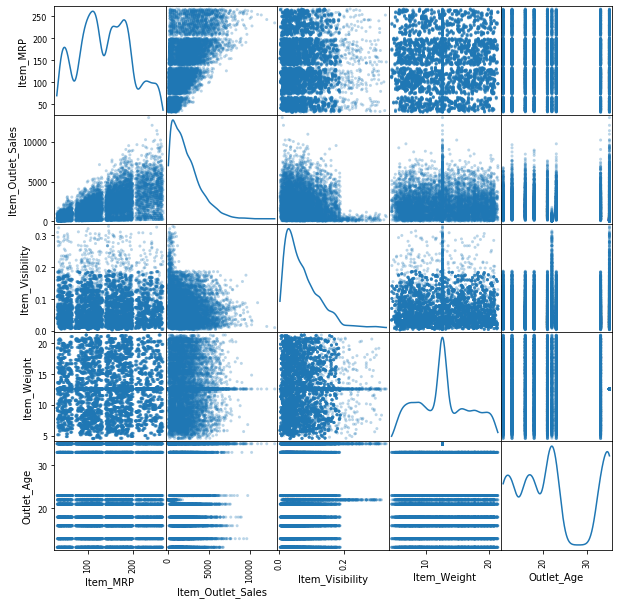

In [19]:
from pandas.plotting import scatter_matrix

scatter_matrix(ttdata, alpha = 0.3, figsize = (10,10), diagonal = 'kde');

Based on "Item_Outlet_Sales" fluctuation,
+ "Item_MRP" *(Maximum Retail Price (list price) of the product))* looks like to have changing density regarding level of sales;
+ The year at which the store has been established provides light indications (see "Outlet_Establishment_Year"). It might bring some granularity information later on.

import seaborn as sns
ax = sns.boxplot(data=ttdata, x='Item_Identifier', y='Item_MRP', hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [20]:
# checking of the replacement.
print(ttdata['Outlet_Size'].value_counts()/ttdata['Outlet_Size'].value_counts().sum()*100)
print()
print(ttdata['Outlet_Type'].value_counts()/ttdata['Outlet_Type'].value_counts().sum()*100)

Medium    61.046184
Small     28.020276
High      10.933540
Name: Outlet_Size, dtype: float64

Supermarket Type1    65.432273
Grocery Store        12.707688
Supermarket Type3    10.975781
Supermarket Type2    10.884258
Name: Outlet_Type, dtype: float64


Text(0.5, 1.0, '')

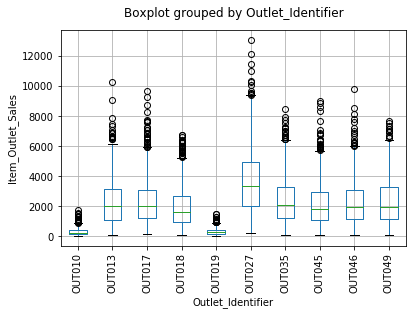

In [21]:
# sales per Outlet_Identifier
ax = ttdata.boxplot(column='Item_Outlet_Sales', by='Outlet_Identifier', rot=90)
ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('')

Text(0.5, 1.0, '')

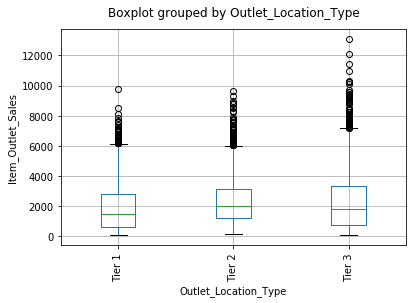

In [22]:
# sales per Outlet_Identifier
ax = ttdata.boxplot(column='Item_Outlet_Sales', by='Outlet_Location_Type', rot=90)
ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('')

sales per Outlet_Identifier

ax = ttdata.boxplot(column='Item_Outlet_Sales', by='Item_Identifier', rot=90, figsize=(12,8))

ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('')

Text(0.5, 1.0, '')

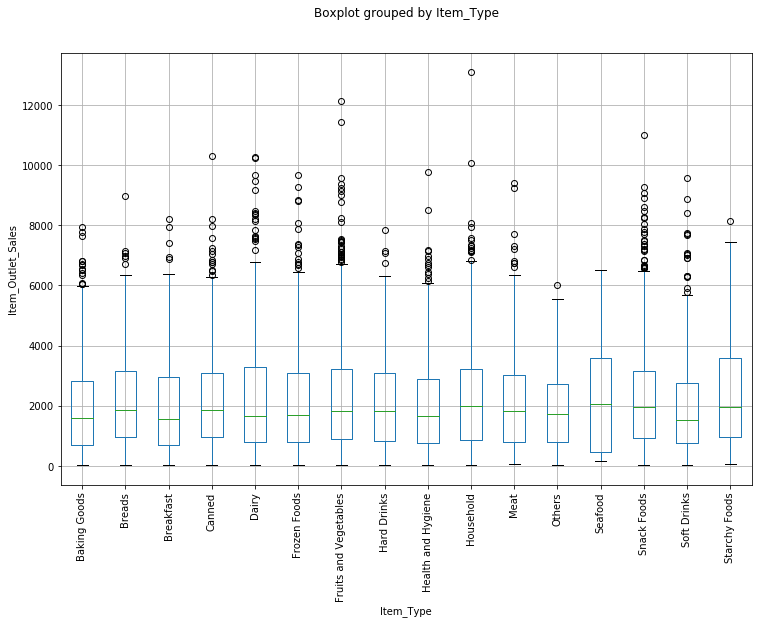

In [23]:
# sales per Outlet_Identifier

ax = ttdata.boxplot(column='Item_Outlet_Sales', by='Item_Type', rot=90, figsize=(12,8))

ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('')

___

# Feature engineering

**Quantity of product sold by Item_Identifier.**

In [24]:
ttdata['Item_Volume']= (ttdata['Item_Outlet_Sales']/ttdata['Item_MRP'])
ttdata.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Age,Item_Volume
0,Low Fat,FDA15,249.8092,3735.1380,Dairy,0.016047,9.30,OUT049,Tier 1,Medium,Supermarket Type1,train,21,14.951963
1,Regular,DRC01,48.2692,443.4228,Soft Drinks,0.019278,5.92,OUT018,Tier 3,Medium,Supermarket Type2,train,11,9.186454
2,Low Fat,FDN15,141.6180,2097.2700,Meat,0.016760,17.50,OUT049,Tier 1,Medium,Supermarket Type1,train,21,14.809346
3,Regular,FDX07,182.0950,732.3800,Fruits and Vegetables,NaN,19.20,OUT010,Tier 3,Medium,Grocery Store,train,22,4.021967
4,Low Fat,NCD19,53.8614,994.7052,Household,NaN,8.93,OUT013,Tier 3,High,Supermarket Type1,train,33,18.467868


**Generate two dataset: 'sales_raw' with the target sales, 'features_raw' with the features as inputs.**

In [26]:
import copy
ttdata_copy = ttdata.copy()
sales_raw = ttdata_copy['Item_Outlet_Sales']
features_raw = ttdata_copy.drop(['Item_Outlet_Sales'], axis = 1)

In [27]:
features_raw.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Type,Item_Visibility,Item_Weight,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type,source,Outlet_Age,Item_Volume
0,Low Fat,FDA15,249.8092,Dairy,0.016047,9.30,OUT049,Tier 1,Medium,Supermarket Type1,train,21,14.951963
1,Regular,DRC01,48.2692,Soft Drinks,0.019278,5.92,OUT018,Tier 3,Medium,Supermarket Type2,train,11,9.186454
2,Low Fat,FDN15,141.6180,Meat,0.016760,17.50,OUT049,Tier 1,Medium,Supermarket Type1,train,21,14.809346
3,Regular,FDX07,182.0950,Fruits and Vegetables,NaN,19.20,OUT010,Tier 3,Medium,Grocery Store,train,22,4.021967
4,Low Fat,NCD19,53.8614,Household,NaN,8.93,OUT013,Tier 3,High,Supermarket Type1,train,33,18.467868


**Normalization of data (features).**

In [71]:
import warnings
warnings.filterwarnings('always')

# Normalizing Numerical features
from sklearn.preprocessing import MinMaxScaler

# initialize a scaler, apply it to features_raw
scaler = MinMaxScaler() # default=(0,1)
numerical = ['Item_Weight', 'Item_MRP', 'Item_Visibility', 'Outlet_Age', 'Item_Volume']

features_rawminmax = pd.DataFrame(data = features_raw)
features_rawminmax[numerical] = scaler.fit_transform(features_raw[numerical])

/Users/mikehatchi/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


item = features_rawminmax[['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP']]
outlet = features_rawminmax[['Outlet_Identifier', 'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']]
item_id = features_rawminmax['Item_Identifier']
outlet_id = features_rawminmax['Outlet_Identifier']

In [74]:
features_rawminmax.dtypes

Item_Fat_Content         object
Item_Identifier          object
Item_MRP                float64
Item_Type                object
Item_Visibility         float64
Item_Weight             float64
Outlet_Identifier        object
Outlet_Location_Type     object
Outlet_Size              object
Outlet_Type              object
Outlet_Age              float64
Item_Volume             float64
dtype: object

item_woid = item.drop(['Item_Identifier'], axis=1 )
outlet_woid = outlet.drop(['Outlet_Identifier'], axis=1 )

#### None-numerical data

In [27]:
#features_final = pd.get_dummies(features_wo_id)
#print(item_id.shape, outlet_id.shape, features_final.shape)

In [82]:
feature_final = pd.get_dummies(features_rawminmax, columns=['Item_Fat_Content',
                                                            'Item_Identifier',
                                                            'Item_Type',
                                                            'Outlet_Identifier',
                                                            'Outlet_Location_Type',
                                                            'Outlet_Size',
                                                            'Outlet_Type'])
print(feature_final.dtypes)
print(feature_final.shape)

Item_MRP                         float64
Item_Visibility                  float64
Item_Weight                      float64
Outlet_Age                       float64
Item_Volume                      float64
                                  ...   
Outlet_Size_Small                  uint8
Outlet_Type_Grocery Store          uint8
Outlet_Type_Supermarket Type1      uint8
Outlet_Type_Supermarket Type2      uint8
Outlet_Type_Supermarket Type3      uint8
Length: 1602, dtype: object
(14204, 1602)


#### Overview of variance of the entire items, then.

varo = []
colnameo = []
plt.figure(figsize=(12,8))
for n, v in zip(feature_final.columns, feature_final.var()):
    varo.append(v)
    colnameo.append(str(n))

plt.plot(varo, colnameo, label = 'outlet')
plt.legend();
plt.show()

**Then, we can notice 5 high variance peaks. Which lead us to think to look at least 5 principal components.**<br>
The underlying work here, is to find the compound of combinations of features that explained sales fluctuations.

___

# Implementation

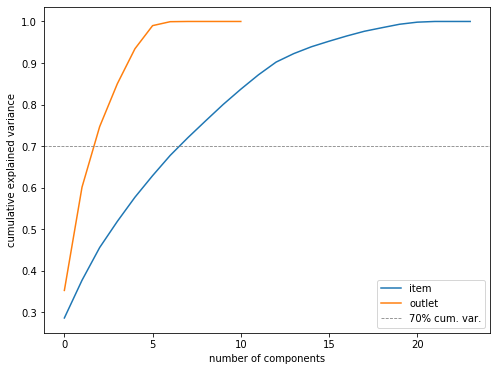

In [73]:
from sklearn.decomposition import PCA

plt.figure(figsize=(8,6))
pca_outlet = PCA().fit(outlet_final)
pca_item = PCA().fit(item_final)

plt.plot(np.cumsum(pca_item.explained_variance_ratio_), label = 'item')
plt.plot(np.cumsum(pca_outlet.explained_variance_ratio_), label = 'outlet')

plt.axhline(y=0.7, color='gray', linewidth=0.8, linestyle='--', label='70% cum. var.')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.legend();
plt.show()

At ~ 70% of cumulative variance are induced by:
- 2 outlet components,
- 6 item components.

In [77]:
pca_outlet = PCA(n_components=2)
pca_outlet.fit(outlet_final)

pca_item = PCA(n_components=6)
pca_item.fit(item_final)
# print(pca.components_)
print("Variance explained components.\n outlet: {} \n item: {}".format(pca_outlet.explained_variance_, pca_item.explained_variance_))

Variance explained components.
 outlet: [0.65345655 0.45960035] 
 item: [0.4506336  0.14248727 0.12366898 0.09872104 0.091504   0.08151149]


In [25]:
# transform features_final using the PCA fit above
reduced_fl = pca.transform(features_final)
# print(reduced_fl)

# new dataframe with Dimensions
reduced_fldata = pd.DataFrame(reduced_fl, columns =['Dimension 1','Dimension 2' ,'Dimension 3','Dimension 4','Dimension 5','Dimension 6']) # 
reduced_fldata.head()

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-0.289439,-0.101706,-0.493762,-0.517479,0.901479,0.154565
1,1.122834,-0.101323,0.857354,-0.314034,-0.369329,0.806961
2,-0.281429,-0.098449,-0.470320,-0.522828,0.902832,0.144432
3,1.050273,0.357571,0.876369,-0.310679,-0.296779,-0.128729
4,0.264845,0.372753,-0.754492,1.286885,0.281023,0.197127


Merging principal components with "target" (aka Item_Outlet_Sales).

In [26]:
reducfl_sales = pd.concat([reduced_fldata, sales_raw], axis=1)
reducfl_sales.head()

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6,Item_Outlet_Sales
0,-0.289439,-0.101706,-0.493762,-0.517479,0.901479,0.154565,3735.1380
1,1.122834,-0.101323,0.857354,-0.314034,-0.369329,0.806961,443.4228
2,-0.281429,-0.098449,-0.470320,-0.522828,0.902832,0.144432,2097.2700
3,1.050273,0.357571,0.876369,-0.310679,-0.296779,-0.128729,732.3800
4,0.264845,0.372753,-0.754492,1.286885,0.281023,0.197127,994.7052


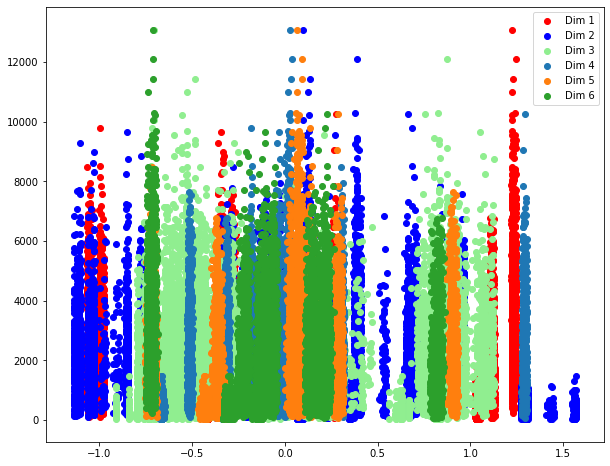

In [112]:
reducfl_sales = reducfl_sales.to_numpy()

plt.figure(figsize=(10,8))

plt.scatter(reducfl_sales[:, 0], reducfl_sales[:, 6], label='Dim 1', c='red')
plt.scatter(reducfl_sales[:, 1], reducfl_sales[:, 6], label='Dim 2', c='blue')
plt.scatter(reducfl_sales[:, 2], reducfl_sales[:, 6], label='Dim 3', c='lightgreen')
plt.scatter(reducfl_sales[:, 3], reducfl_sales[:, 6], label='Dim 4', c='#1f77b4')
plt.scatter(reducfl_sales[:, 4], reducfl_sales[:, 6], label='Dim 5', c='#ff7f0e')
plt.scatter(reducfl_sales[:, 5], reducfl_sales[:, 6], label='Dim 6', c='#2ca02c')

plt.legend()
plt.show()

### [WIP]